In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean
import scipy as sc
import matplotlib.ticker as mticker

In [2]:
#import data from the Outlet, Jefferson Inlet, and Riparian Inlet
Outlet_df = pd.read_csv('Outlet.csv')
Jefferson_df = pd.read_csv('Jefferson_Inlet.csv')
Riparia_df = pd.read_csv('Riparia_Inlet.csv')

In [3]:
Jefferson_df.head()

,sample id,data entry author,state,lab id,lab name,collection date,collection time (America/Los_Angeles),stored collectionTime,tested by,site id,...,pH,Salinity (PSU),Turbidity (NTU),Ammonia/NH3 (ppm),Nitrates/NO3 (mg/L),Nitrites/NO2 (mg/L),Nitrogen(NO3+NO2) (mg/L),Phosphate (mg/L),Dissolved Oxygen (mg/L),publication time
0,eddf75b5-bd86-4811-8039-8eb1444cc002,Google_114632842198855839133,California,16,South Bay,5/11/2025,10:00:00 AM,2025-05-11T17:00:00.000Z,CC,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-13T00:37:25.407Z
1,0c8d8bf7-fa61-4afb-8cbf-0066fe8a9b75,Google_114632842198855839133,California,16,South Bay,4/27/2025,10:30:00 AM,2025-04-27T17:30:00.000Z,CC,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-29T00:47:19.334Z
2,69087c3b-9ed8-4102-bb02-a1201ea4bb5d,Google_114632842198855839133,California,16,South Bay,4/13/2025,10:00:00 AM,2025-04-13T17:00:00.000Z,CC,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-14T23:26:26.236Z
3,86fa684f-2209-48ce-a352-c8287e1b5ca2,Google_114632842198855839133,California,16,South Bay,3/30/2025,10:00:00 AM,2025-03-30T17:00:00.000Z,CC,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-01T00:40:58.989Z
4,6530ba67-9e8f-4676-93d8-ef5a7ad6b658,Google_114632842198855839133,California,16,South Bay,3/16/2025,10:30:00 AM,2025-03-16T17:30:00.000Z,CC,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-17T21:36:49.516Z


In [4]:
Outlet_df.head()

,sample id,data entry author,state,lab id,lab name,collection date,collection time (America/Los_Angeles),stored collectionTime,tested by,site id,...,pH,Salinity (PSU),Turbidity (NTU),Ammonia/NH3 (ppm),Nitrates/NO3 (mg/L),Nitrites/NO2 (mg/L),Nitrogen(NO3+NO2) (mg/L),Phosphate (mg/L),Dissolved Oxygen (mg/L),publication time
0,ea69492f-38fe-45bc-a091-f1ec7703f120,Google_114632842198855839133,California,16,South Bay,5/11/2025,10:00:00 AM,2025-05-11T17:00:00.000Z,CC,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-13T00:38:08.658Z
1,f822a5ec-0700-4771-b268-eb26bb45e46e,Google_114632842198855839133,California,16,South Bay,4/27/2025,10:30:00 AM,2025-04-27T17:30:00.000Z,CC,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-29T00:48:07.804Z
2,e3892556-2762-4669-8161-dfabfbe25037,Google_114632842198855839133,California,16,South Bay,4/13/2025,10:00:00 AM,2025-04-13T17:00:00.000Z,CC,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-14T23:27:13.561Z
3,2c111671-09c1-41f7-829c-f46240987277,Google_114632842198855839133,California,16,South Bay,3/30/2025,10:00:00 AM,2025-03-30T17:00:00.000Z,CC,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-01T00:41:42.531Z
4,5220f2d4-9e1f-42ec-829d-1110a0b9996f,Google_114632842198855839133,California,16,South Bay,3/16/2025,10:30:00 AM,2025-03-16T17:30:00.000Z,CC,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-17T21:37:19.736Z


In [5]:
Riparia_df.head()

,sample id,data entry author,state,lab id,lab name,collection date,collection time (America/Los_Angeles),stored collectionTime,tested by,site id,...,pH,Salinity (PSU),Turbidity (NTU),Ammonia/NH3 (ppm),Nitrates/NO3 (mg/L),Nitrites/NO2 (mg/L),Nitrogen(NO3+NO2) (mg/L),Phosphate (mg/L),Dissolved Oxygen (mg/L),publication time
0,c35c3aa3-7266-44cf-9305-14c6e4306c72,Google_114632842198855839133,California,16,South Bay,5/11/2025,10:00:00 AM,2025-05-11T17:00:00.000Z,CC,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-13T00:39:21.781Z
1,980e12b1-40c4-4ddc-bda5-d2176521c629,Google_114632842198855839133,California,16,South Bay,4/27/2025,10:30:00 AM,2025-04-27T17:30:00.000Z,CC,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-29T00:48:35.182Z
2,96cc3f24-2546-471b-bcf1-e852b2ce6b74,Google_114632842198855839133,California,16,South Bay,4/13/2025,10:00:00 AM,2025-04-13T17:00:00.000Z,CC,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-14T23:27:48.144Z
3,3f4ac2a8-16d0-472c-bd89-2ce8877fd17d,Google_114632842198855839133,California,16,South Bay,3/30/2025,10:00:00 AM,2025-03-30T17:00:00.000Z,CC,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-01T00:42:24.038Z
4,ea6633f0-6db0-4d3f-acfc-deac9175a602,Google_114632842198855839133,California,16,South Bay,3/16/2025,10:30:00 AM,2025-03-16T17:30:00.000Z,CC,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-17T21:38:03.703Z


In [6]:
#check the type of data
Outlet_df.columns

Index(['sample id', 'data entry author', 'state', 'lab id', 'lab name',
       'collection date', 'collection time (America/Los_Angeles)',
       'stored collectionTime', 'tested by', 'site id', 'site name',
       'latitude', 'longitude', 'water temperature (f)', 'air temperature (f)',
       'current weather', 'recent precipitation', 'tide', 'wave height',
       'wind speed (mph)', 'wind direction', 'Enterococcus modifier',
       'Enterococcus (mpn/100mL)', 'Ecoli modifier', 'Ecoli (mpn/100mL)',
       'Total Coliform modifier', 'Total Coliform (mpn/100mL)', 'comments',
       'pH', 'Salinity (PSU)', 'Turbidity (NTU)', 'Ammonia/NH3 (ppm)',
       'Nitrates/NO3 (mg/L)', 'Nitrites/NO2 (mg/L)',
       'Nitrogen(NO3+NO2) (mg/L)', 'Phosphate (mg/L)',
       'Dissolved Oxygen (mg/L)', 'publication time'],
      dtype='object')

In [7]:
#interested only in collection date and enterococcus counts
Outlet_df = Outlet_df[['collection date', 'Enterococcus (mpn/100mL)']]
Jefferson_df = Jefferson_df[['collection date', 'Enterococcus (mpn/100mL)']]
Riparia_df = Riparia_df[['collection date', 'Enterococcus (mpn/100mL)']]

In [8]:
Outlet_df.head()

,collection date,Enterococcus (mpn/100mL)
0,5/11/2025,235
1,4/27/2025,24196
2,4/13/2025,959
3,3/30/2025,481
4,3/16/2025,932


In [9]:
Jefferson_df.head()

,collection date,Enterococcus (mpn/100mL)
0,5/11/2025,95
1,4/27/2025,11199
2,4/13/2025,393
3,3/30/2025,341
4,3/16/2025,548


In [10]:
Riparia_df.head()

,collection date,Enterococcus (mpn/100mL)
0,5/11/2025,169
1,4/27/2025,2755
2,4/13/2025,132
3,3/30/2025,1497
4,3/16/2025,213


In [11]:
#checking sizes of sets
(Outlet_df.shape, Jefferson_df.shape, Riparia_df.shape)

((246, 2), (239, 2), (220, 2))

In [12]:
(Outlet_df.dtypes, Jefferson_df.dtypes, Riparia_df.dtypes)

(collection date             object
 Enterococcus (mpn/100mL)     int64
 dtype: object,
 collection date             object
 Enterococcus (mpn/100mL)     int64
 dtype: object,
 collection date             object
 Enterococcus (mpn/100mL)     int64
 dtype: object)

In [13]:
#convert collection date column from text to date
Outlet_df['collection date'] = pd.to_datetime(Outlet_df['collection date'])
Jefferson_df['collection date'] = pd.to_datetime(Jefferson_df['collection date'])
Riparia_df['collection date'] = pd.to_datetime(Riparia_df['collection date'])

In [14]:
Outlet_df.head()

,collection date,Enterococcus (mpn/100mL)
0,2025-05-11,235
1,2025-04-27,24196
2,2025-04-13,959
3,2025-03-30,481
4,2025-03-16,932


In [15]:
#relabel columns
Outlet_df = Outlet_df.rename(columns = {'collection date': 'Collection Date', 'Enterococcus (mpn/100mL)': 'Marsh Outlet'})
Jefferson_df = Jefferson_df.rename(columns = {'collection date': 'Collection Date', 'Enterococcus (mpn/100mL)' : 'Jefferson Inlet'})
Riparia_df = Riparia_df.rename(columns = {'collection date': 'Collection Date', 'Enterococcus (mpn/100mL)' : 'Riparian Corridor Inlet'})

In [16]:
Jefferson_df.head()

,Collection Date,Jefferson Inlet
0,2025-05-11,95
1,2025-04-27,11199
2,2025-04-13,393
3,2025-03-30,341
4,2025-03-16,548


In [17]:
#merging the 3 dateframes into new merged_df
merged_df = Outlet_df.merge(Jefferson_df, on = 'Collection Date', how ='outer')
merged_df =merged_df.merge(Riparia_df, on = 'Collection Date', how ='outer')

In [18]:
#sorting by dates
merged_df = merged_df.sort_values('Collection Date')

In [19]:
merged_df.head()

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet
0,2005-10-09,10.0,52.0,NaN
1,2005-10-24,305.0,425.0,NaN
2,2005-11-06,522.0,119.0,NaN
3,2005-11-20,118.0,260.0,NaN
4,2005-12-04,20.0,1334.0,NaN


In [20]:
merged_df.shape

(249, 4)

In [21]:
#averaging inlets
merged_df['Average Inlet'] = merged_df[['Jefferson Inlet', 'Riparian Corridor Inlet']].mean(axis = 1, skipna=True)

In [22]:
merged_df.head()

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet
0,2005-10-09,10.0,52.0,NaN,52.0
1,2005-10-24,305.0,425.0,NaN,425.0
2,2005-11-06,522.0,119.0,NaN,119.0
3,2005-11-20,118.0,260.0,NaN,260.0
4,2005-12-04,20.0,1334.0,NaN,1334.0


In [23]:
#generating geometric means
merged_df['Geometric Mean Inlet'] = (merged_df[['Jefferson Inlet', 'Riparian Corridor Inlet']].apply(lambda row: np.exp(np.log(row.dropna()).mean()) if row.notna().any() else np.nan, axis=1))

merged_df['GM Difference'] = merged_df['Geometric Mean Inlet']- merged_df['Marsh Outlet']

merged_df

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference
0,2005-10-09,10.0,52.0,NaN,52.0,52.000000,42.000000
1,2005-10-24,305.0,425.0,NaN,425.0,425.000000,120.000000
2,2005-11-06,522.0,119.0,NaN,119.0,119.000000,-403.000000
3,2005-11-20,118.0,260.0,NaN,260.0,260.000000,142.000000
4,2005-12-04,20.0,1334.0,NaN,1334.0,1334.000000,1314.000000
...,...,...,...,...,...,...,...
244,2025-03-16,932.0,548.0,213.0,380.5,341.648943,-590.351057
245,2025-03-30,481.0,341.0,1497.0,919.0,714.476732,233.476732
246,2025-04-13,959.0,393.0,132.0,262.5,227.763035,-731.236965
247,2025-04-27,24196.0,11199.0,2755.0,6977.0,5554.569740,-18641.430260


(0.0, 25405.3)

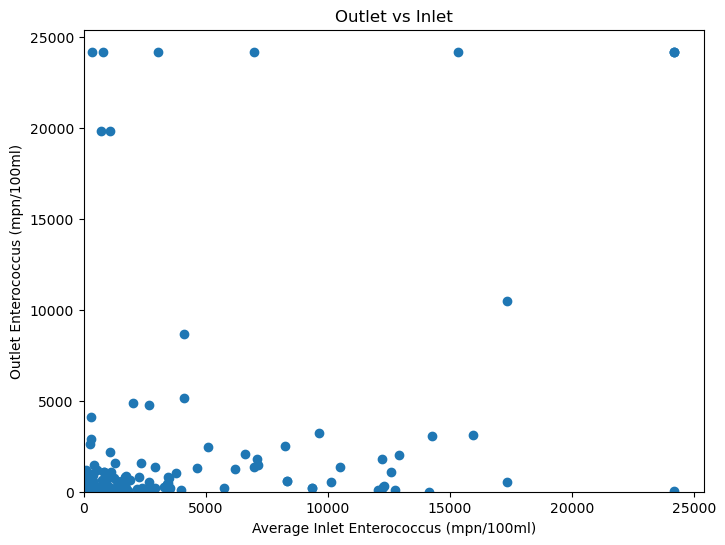

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(merged_df['Average Inlet'], merged_df['Marsh Outlet'])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Average Inlet Enterococcus (mpn/100ml)')
plt.ylabel('Outlet Enterococcus (mpn/100ml)')
plt.title ('Outlet vs Inlet')
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [25]:
#difference between average inlet and the outlet
merged_df['Difference'] = merged_df['Average Inlet'] - merged_df['Marsh Outlet']

Text(0.5, 1.0, 'Removal of Enterococcus by Ballona Wetlands')

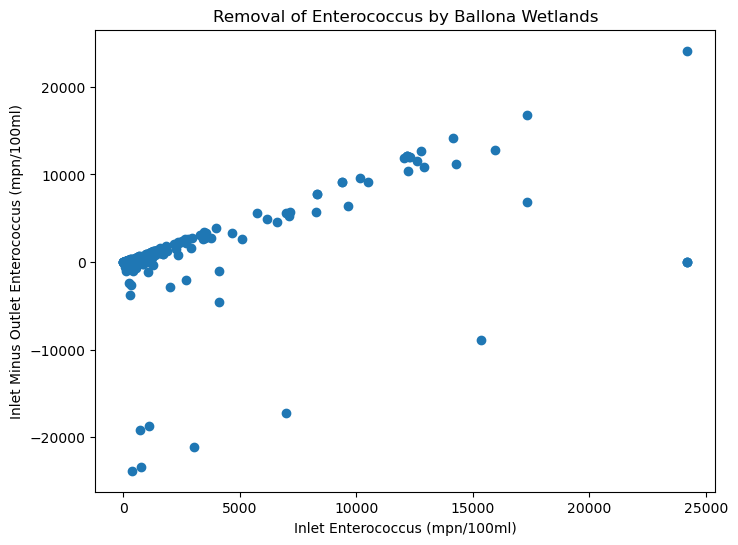

In [26]:
plt.figure(figsize=(8,6))
plt.scatter( merged_df['Average Inlet'], merged_df['Difference'])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel ('Inlet Enterococcus (mpn/100ml)')
plt.ylabel ('Inlet Minus Outlet Enterococcus (mpn/100ml)')
plt.title ('Removal of Enterococcus by Ballona Wetlands')

In [27]:
#need a Year column to group by
merged_df['Year'] = merged_df['Collection Date'].dt.year

In [28]:
#checking which years are a sink/source
counts_by_year = (merged_df.groupby("Year").agg(non_positive=("GM Difference", lambda s: (s <= 0).sum()), positive=("GM Difference", lambda s: (s > 0).sum())))

print(counts_by_year)


      non_positive  positive
Year                        
2005             1         5
2006             3        10
2007             1        11
2008             1        11
2009             0        10
2010             3        10
2011             3         7
2012             3        12
2013             1        12
2014             7         4
2015             4         9
2016             3        11
2017             1        12
2018             6         9
2019             5        11
2020             0         3
2021             0         6
2022             4        10
2023             5        11
2024             8         7
2025             5         2


In [29]:
pd.set_option('display.max_rows', 25)
merged_df

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference,Difference,Year
0,2005-10-09,10.0,52.0,NaN,52.0,52.000000,42.000000,42.0,2005
1,2005-10-24,305.0,425.0,NaN,425.0,425.000000,120.000000,120.0,2005
2,2005-11-06,522.0,119.0,NaN,119.0,119.000000,-403.000000,-403.0,2005
3,2005-11-20,118.0,260.0,NaN,260.0,260.000000,142.000000,142.0,2005
4,2005-12-04,20.0,1334.0,NaN,1334.0,1334.000000,1314.000000,1314.0,2005
...,...,...,...,...,...,...,...,...,...
244,2025-03-16,932.0,548.0,213.0,380.5,341.648943,-590.351057,-551.5,2025
245,2025-03-30,481.0,341.0,1497.0,919.0,714.476732,233.476732,438.0,2025
246,2025-04-13,959.0,393.0,132.0,262.5,227.763035,-731.236965,-696.5,2025
247,2025-04-27,24196.0,11199.0,2755.0,6977.0,5554.569740,-18641.430260,-17219.0,2025


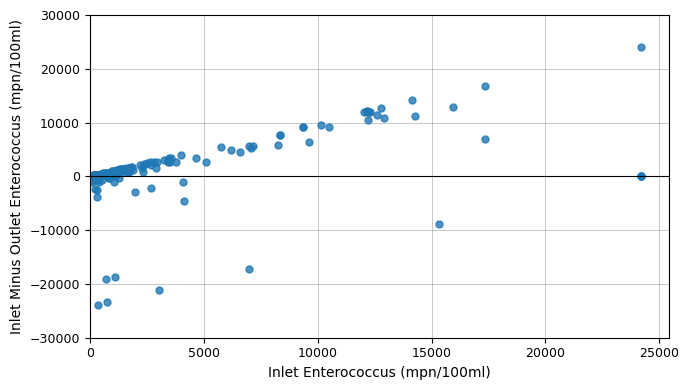

In [30]:
#to plot using Average Inlet vs Difference

plt.rcParams.update({
    "font.size": 10,  
    "font.family": "sans-serif",
    "axes.labelsize": 10,     
    "axes.titlesize": 11,   
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

fig, ax = plt.subplots(figsize=(7, 4))  

ax.scatter(merged_df['Average Inlet'], merged_df['Difference'], alpha=0.8)

ax.set_xlabel('Inlet Enterococcus (mpn/100ml)')
ax.set_ylabel('Inlet Minus Outlet Enterococcus (mpn/100ml)')
#ax.set_title('Removal of Enterococcus by Ballona Wetlands')

ax.axhline(0, color='black', linewidth=0.8, linestyle='-')

ax.set_xlim(left=0)                 
ax.set_ylim(-30000, 30000)   

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig("ballona_wetlands.pdf", bbox_inches="tight")
plt.show()


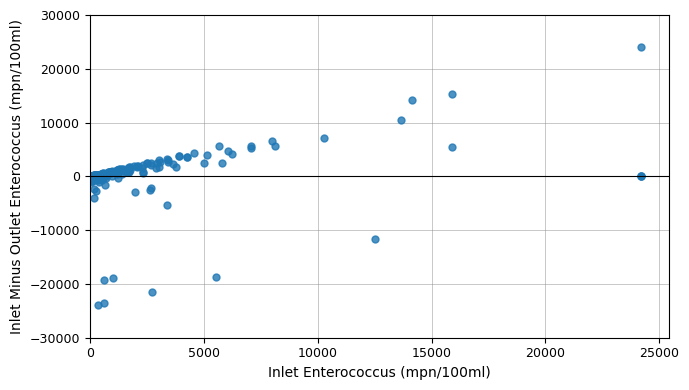

In [31]:
#similar plot but now trying Geometric Mean Inlet vs GM Difference

plt.rcParams.update({
    "font.size": 10, 
    "font.family": "sans-serif",
    "axes.labelsize": 10,      
    "axes.titlesize": 11,      
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

fig, ax = plt.subplots(figsize=(7, 4))  

ax.scatter(merged_df['Geometric Mean Inlet'], merged_df['GM Difference'], alpha=0.8)

ax.set_xlabel('Inlet Enterococcus (mpn/100ml)')
ax.set_ylabel('Inlet Minus Outlet Enterococcus (mpn/100ml)')
#ax.set_title('Removal of Enterococcus by Ballona Wetlands')

ax.axhline(0, color='black', linewidth=0.8, linestyle='-')

ax.set_xlim(left=0)                 
ax.set_ylim(-30000, 30000)          

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.set_axisbelow(True)  

plt.tight_layout()
#plt.savefig("ballona_wetlands.png", dpi=300, bbox_inches="tight")  
plt.savefig("ballona_wetlands.pdf", bbox_inches="tight")
plt.show()

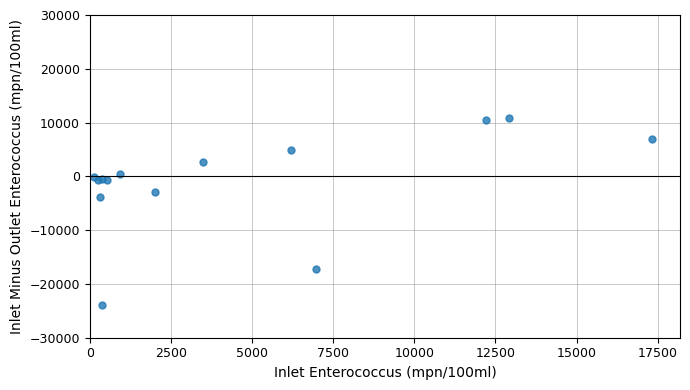

In [32]:
#trying to look at different start/end dates
plt.rcParams.update({
    "font.size": 10,           
    "font.family": "sans-serif",
    "axes.labelsize": 10,      
    "axes.titlesize": 11,  
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

fig, ax = plt.subplots(figsize=(7, 4)) 

#ax.scatter(merged_df['Average Inlet'], merged_df['Difference'], alpha=0.8)


#creating a date range

merged_df['Collection Date'] = pd.to_datetime(merged_df['Collection Date'])
start_date = "2024-05-11"
end_date = "2025-05-11"
mask = (merged_df['Collection Date'] >= start_date) & (merged_df['Collection Date'] <= end_date)
filtered_df = merged_df.loc[mask]

ax.scatter(filtered_df['Average Inlet'], filtered_df['Difference'], alpha=0.8)


ax.set_xlabel('Inlet Enterococcus (mpn/100ml)')
ax.set_ylabel('Inlet Minus Outlet Enterococcus (mpn/100ml)')
#ax.set_title('Removal of Enterococcus by Ballona Wetlands')


ax.axhline(0, color='black', linewidth=0.8, linestyle='-')

ax.set_xlim(left=0)       
ax.set_ylim(-30000, 30000) 

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.set_axisbelow(True) 


plt.tight_layout()
plt.savefig("ballona_wetlands2025.pdf", bbox_inches="tight")
plt.show()


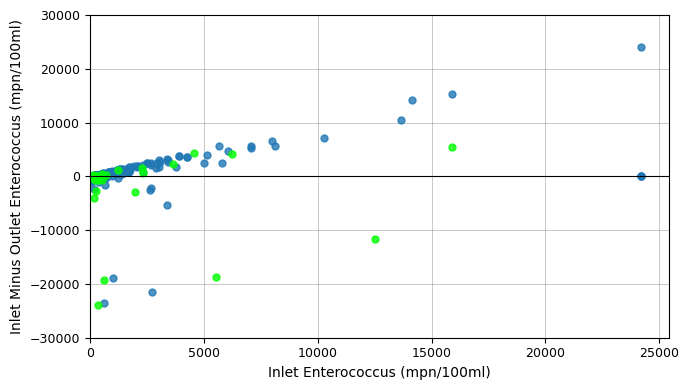

In [33]:
#now splitting the data to show recent changes and plotting in colors

plt.rcParams.update({
    "font.size": 10,   
    "font.family": "sans-serif",
    "axes.labelsize": 10,  
    "axes.titlesize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

fig, ax = plt.subplots(figsize=(7, 4))  

#splitting based on the cutoff 2 years before last data collected in May 2025
cutoff = pd.to_datetime("2023-05-11") # cutoff date 
#cutoff = pd.to_datetime("2017-01-01")
before_df = merged_df[merged_df['Collection Date'] < cutoff]
after_df  = merged_df[merged_df['Collection Date'] >= cutoff]

#blue (before) and green (after)
ax.scatter(before_df['Geometric Mean Inlet'], before_df['GM Difference'], alpha=0.8, label="Before May 11, 2023")
ax.scatter(after_df['Geometric Mean Inlet'], after_df['GM Difference'], alpha=0.8, color="lime", label="On/After May 11, 2023")

ax.set_xlabel('Inlet Enterococcus (mpn/100ml)')
ax.set_ylabel('Inlet Minus Outlet Enterococcus (mpn/100ml)')
#ax.set_title('Removal of Enterococcus by Ballona Wetlands')

ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
ax.set_xlim(left=0)                 
ax.set_ylim(-30000, 30000)        
ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.set_axisbelow(True)  

plt.tight_layout()
plt.savefig("ballona_wetlands_split2023_GM.pdf", bbox_inches="tight")
plt.show()

In [34]:
column_array = ['Marsh Outlet', 'Jefferson Inlet', 'Riparian Corridor Inlet', 'Average Inlet']

In [35]:
print('Ballona Fresh Water Marsh' + '\n')

for x in column_array:
    print(x + '\n' + str(merged_df[x].describe()) + '\n' + "Geometric mean: " + str(gmean(merged_df[x].dropna())) + '\n')

Ballona Fresh Water Marsh

Marsh Outlet
count      248.000000
mean      1455.169355
std       4651.421377
min         10.000000
25%         52.000000
50%        134.500000
75%        589.500000
max      24196.000000
Name: Marsh Outlet, dtype: float64
Geometric mean: 186.30779577163133

Jefferson Inlet
count      243.000000
mean      2046.769547
std       4715.154750
min         10.000000
25%        120.500000
50%        369.000000
75%       1344.000000
max      24196.000000
Name: Jefferson Inlet, dtype: float64
Geometric mean: 408.9971232491764

Riparian Corridor Inlet
count      221.000000
mean      3149.036199
std       6573.478317
min         10.000000
25%        120.000000
50%        376.000000
75%       2105.000000
max      24196.000000
Name: Riparian Corridor Inlet, dtype: float64
Geometric mean: 497.0732872288771

Average Inlet
count      248.000000
mean      2473.252016
std       4601.861510
min         10.000000
25%        155.125000
50%        495.500000
75%       1925.000000

In [36]:
merged_df['Difference'].describe()

count      247.000000
mean      1020.010121
std       5010.446254
min     -23834.000000
25%          6.750000
50%        165.500000
75%       1286.250000
max      24133.000000
Name: Difference, dtype: float64

In [37]:
pd.set_option('display.max_rows', 20)
merged_df

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference,Difference,Year
0,2005-10-09,10.0,52.0,NaN,52.0,52.000000,42.000000,42.0,2005
1,2005-10-24,305.0,425.0,NaN,425.0,425.000000,120.000000,120.0,2005
2,2005-11-06,522.0,119.0,NaN,119.0,119.000000,-403.000000,-403.0,2005
3,2005-11-20,118.0,260.0,NaN,260.0,260.000000,142.000000,142.0,2005
4,2005-12-04,20.0,1334.0,NaN,1334.0,1334.000000,1314.000000,1314.0,2005
...,...,...,...,...,...,...,...,...,...
244,2025-03-16,932.0,548.0,213.0,380.5,341.648943,-590.351057,-551.5,2025
245,2025-03-30,481.0,341.0,1497.0,919.0,714.476732,233.476732,438.0,2025
246,2025-04-13,959.0,393.0,132.0,262.5,227.763035,-731.236965,-696.5,2025
247,2025-04-27,24196.0,11199.0,2755.0,6977.0,5554.569740,-18641.430260,-17219.0,2025


In [38]:
merged_df[merged_df['Difference'].isna()]

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference,Difference,Year
15,2006-11-05,NaN,552.0,NaN,552.0,552.0,NaN,NaN,2006
196,2022-01-09,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2022


In [39]:
merged_df = merged_df[~merged_df['Difference'].isna()]
merged_df = merged_df.copy()

In [40]:
merged_df.loc [:, 'Inlet Log10'] = np.log10(merged_df['Average Inlet'])
merged_df.loc [:, 'Outlet Log10'] = np.log10(merged_df['Marsh Outlet'])
merged_df.loc [:, 'Difference Log10'] = np.log10(merged_df['Average Inlet'] / merged_df['Marsh Outlet'])

In [41]:
merged_df

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference,Difference,Year,Inlet Log10,Outlet Log10,Difference Log10
0,2005-10-09,10.0,52.0,NaN,52.0,52.000000,42.000000,42.0,2005,1.716003,1.000000,0.716003
1,2005-10-24,305.0,425.0,NaN,425.0,425.000000,120.000000,120.0,2005,2.628389,2.484300,0.144089
2,2005-11-06,522.0,119.0,NaN,119.0,119.000000,-403.000000,-403.0,2005,2.075547,2.717671,-0.642124
3,2005-11-20,118.0,260.0,NaN,260.0,260.000000,142.000000,142.0,2005,2.414973,2.071882,0.343091
4,2005-12-04,20.0,1334.0,NaN,1334.0,1334.000000,1314.000000,1314.0,2005,3.125156,1.301030,1.824126
...,...,...,...,...,...,...,...,...,...,...,...,...
244,2025-03-16,932.0,548.0,213.0,380.5,341.648943,-590.351057,-551.5,2025,2.580355,2.969416,-0.389061
245,2025-03-30,481.0,341.0,1497.0,919.0,714.476732,233.476732,438.0,2025,2.963316,2.682145,0.281170
246,2025-04-13,959.0,393.0,132.0,262.5,227.763035,-731.236965,-696.5,2025,2.419129,2.981819,-0.562689
247,2025-04-27,24196.0,11199.0,2755.0,6977.0,5554.569740,-18641.430260,-17219.0,2025,3.843669,4.383744,-0.540075


In [42]:
print(merged_df['Inlet Log10'].mean())
print(merged_df['Outlet Log10'].mean())
print(merged_df['Difference Log10'].mean())
print(merged_df['Difference Log10'].std())


2.768191312736124
2.2753736634204182
0.49281764931570604
0.7484690389089743


In [43]:
#match sampling events
#test log outlet vs inlet
#paired t-test

from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(merged_df['Outlet Log10'], merged_df['Inlet Log10'])

print(f"t = {t_stat:.3f}, p = {p_value:.3g}")

t = -10.348, p = 4.54e-21


Comparing the Log Outlet - Log Inlet,
if t < 0, consistently lower concentrations (in log space); 
if very low p value reject null hypothesis (mean outlet = mean inlet)

In [44]:
#merged_df['Year'] = pd.to_datetime(merged_df['Collection Date']).dt.year

In [45]:
avg_diff_per_year = (merged_df.groupby('Year')['Difference'].mean().round(2))

print(avg_diff_per_year)

Year
2005     211.50
2006    1150.62
2007    2430.62
2008    1791.21
2009     618.25
         ...   
2021     764.58
2022    1309.25
2023    -929.00
2024      82.63
2025   -2612.86
Name: Difference, Length: 21, dtype: float64


In [46]:
#check seasonal patterns
def month_to_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"


merged_df['Season'] = merged_df['Collection Date'].dt.month.map(month_to_season)

avg_diff_per_season = (merged_df.groupby('Season')['Difference'].mean().round(2))

avg_Log_diff_per_season = (merged_df.groupby('Season')['Difference Log10'].mean().round(3))

print(avg_diff_per_season)
print(avg_Log_diff_per_season)

Season
Fall      1292.47
Spring     833.34
Winter     941.97
Name: Difference, dtype: float64
Season
Fall      0.506
Spring    0.390
Winter    0.557
Name: Difference Log10, dtype: float64


In [47]:
#ANOVA: model Difference or Log Difference as function of Season (categorical)
#see if the mean difference is different across the seasons
#ordinary least square regression: ols()
#ANOVA table: anova_diff, one-way ANOVA (one predictor, season), typ 1-3 does not matter

import statsmodels.api as sm
from statsmodels.formula.api import ols

model_diff = ols('Difference ~ C(Season)', data=merged_df).fit()
anova_diff = sm.stats.anova_lm(model_diff, typ=2)
print("ANOVA for Difference")
print(anova_diff, "\n")

model_log = ols('Difference_Log10 ~ C(Season)', data=merged_df.rename(columns={'Difference Log10': 'Difference_Log10'})).fit()
anova_log = sm.stats.anova_lm(model_log, typ=2)
print("ANOVA for Difference Log10")
print(anova_log)

ANOVA for Difference
                 sum_sq     df         F    PR(>F)
C(Season)  8.792906e+06    2.0  0.173949  0.840443
Residual   6.166932e+09  244.0       NaN       NaN 

ANOVA for Difference Log10
               sum_sq     df         F    PR(>F)
C(Season)    1.177185    2.0  1.051108  0.351127
Residual   136.633467  244.0       NaN       NaN


In [48]:
#variation within seasons (6.166932e+09) >> variation between seasons (8.792906e+06) for Difference
#variation within seasons (1.177185) >> variation between seasons (136.633467) for log Difference
#less than 1% varration attributable to season
#small F, large p

In [49]:
percent_cleaning_per_year = (merged_df.groupby('Year')['Difference'].apply(lambda s: 100 * (s > 0).mean()).round(1))

print(percent_cleaning_per_year)

Year
2005     83.3
2006     61.5
2007     91.7
2008     91.7
2009    100.0
        ...  
2021    100.0
2022     78.6
2023     81.2
2024     53.3
2025     28.6
Name: Difference, Length: 21, dtype: float64


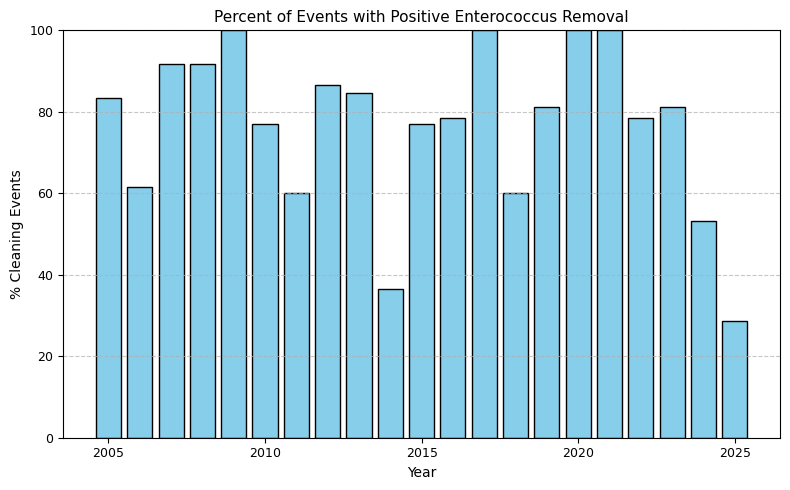

In [50]:
plt.figure(figsize=(8,5))
plt.bar(percent_cleaning_per_year.index, percent_cleaning_per_year.values, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('% Cleaning Events')
plt.title('Percent of Events with Positive Enterococcus Removal')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
samples_per_year = (merged_df.groupby('Year')['Difference'].count())

print(samples_per_year)

Year
2005     6
2006    13
2007    12
2008    12
2009    10
        ..
2021     6
2022    14
2023    16
2024    15
2025     7
Name: Difference, Length: 21, dtype: int64


In [52]:
total_counts = { #dictionary
    'Marsh Outlet': Outlet_df['Marsh Outlet'].count(),
    'Jefferson Inlet': Jefferson_df['Jefferson Inlet'].count(),
    'Riparian Corridor Inlet': Riparia_df['Riparian Corridor Inlet'].count()
}

print(total_counts)

{'Marsh Outlet': np.int64(246), 'Jefferson Inlet': np.int64(239), 'Riparian Corridor Inlet': np.int64(220)}


In [53]:
valid = merged_df['Difference'].dropna()

#sink
pct_Sink = 100 * (valid > 0).mean()

print(f"Overall % of cleaning events: {pct_Sink:.1f}%")


#source
pct_Source = 100 * (valid < 0).mean()

print(f"Overall % of Source events: {pct_Source:.1f}%")

#neutral
pct_Neutral = 100 * (valid == 0).mean()

print(f"Overall % of Neutral events: {pct_Neutral:.1f}%")


Overall % of cleaning events: 76.1%
Overall % of Source events: 21.1%
Overall % of Neutral events: 2.8%


In [54]:
num_dirtier_events = (merged_df['Difference'] < 0).sum()

print(f"# events where outlet water was dirtier than inlet: {num_dirtier_events}")

# events where outlet water was dirtier than inlet: 52


In [55]:
merged_df['Jefferson Inlet'].describe()

count      242.000000
mean      2052.946281
std       4723.941861
min         10.000000
25%        120.250000
50%        368.500000
75%       1349.000000
max      24196.000000
Name: Jefferson Inlet, dtype: float64

In [56]:
merged_df['Riparian Corridor Inlet'].describe()

count      221.000000
mean      3149.036199
std       6573.478317
min         10.000000
25%        120.000000
50%        376.000000
75%       2105.000000
max      24196.000000
Name: Riparian Corridor Inlet, dtype: float64

In [57]:
merged_df['Marsh Outlet'].describe()

count      247.000000
mean      1461.020243
std       4659.951357
min         10.000000
25%         52.000000
50%        135.000000
75%        590.000000
max      24196.000000
Name: Marsh Outlet, dtype: float64

In [58]:
 #first 18 years
filtered_df = merged_df[merged_df['Collection Date'] < "2023/05/11"]   
valid2 = filtered_df['Difference'].dropna()

#Sink
pct_Sink = 100 * (valid2 > 0).mean()

print(f"Overall % of cleaning events first 18 years: {pct_Sink:.1f}%")


#most recent 2 years

filtered_df = merged_df[merged_df['Collection Date'] >= "2023/05/11"]  
valid2 = filtered_df['Difference'].dropna()

pct_Sink = 100 * (valid2 > 0).mean()

print(f"Overall % of cleaning events last 2 years: {pct_Sink:.1f}%")


Overall % of cleaning events first 18 years: 79.8%
Overall % of cleaning events last 2 years: 48.3%


In [59]:
#pd.set_option('display.max_rows', 249)
#merged_df

In [60]:
#ratio = Outlet/Inlet
merged_df['Ratio'] = merged_df['Marsh Outlet'] /merged_df['Average Inlet']

In [61]:
#calculating geometric mean percent change & 95% CI

#returns a series [geometric mean, lower CI, upper CI, number of samples]
def gm_and_ci(series: pd.Series):               #input will be .groupby('Year')['Ratio']
    s = series.dropna()
    n = len(s)                                  #number of samples
    if n == 0:                                  #make sure not empty set 
        return pd.Series({'GM': np.nan, 'CI_lo': np.nan, 'CI_hi': np.nan, 'n': 0})
    ln_vals = np.log(s)                        #converting ['Ratio'] into log space
    m = ln_vals.mean()                        #mean log_ratio
    se = ln_vals.std(ddof=1) / np.sqrt(n) if n > 1 else 0.0    #std error in log space
    z = 1.96                                  #95% CI
    return pd.Series({
        'GM': float(np.exp(m)),
        'CI_lo': float(np.exp(m - z*se)),
        'CI_hi': float(np.exp(m + z*se)),
        'n': int(n),
    })

stats_per_year = (merged_df.groupby('Year', dropna = True)['Ratio'].apply(gm_and_ci).unstack().reset_index().sort_values('Year'))

stats_per_year


,Year,GM,CI_lo,CI_hi,n
0,2005,0.348053,0.078558,1.542067,6.0
1,2006,0.362867,0.101605,1.295924,13.0
2,2007,0.122143,0.042755,0.348939,12.0
3,2008,0.114046,0.036139,0.359896,12.0
4,2009,0.263792,0.134559,0.517141,10.0
...,...,...,...,...,...
16,2021,0.200152,0.079191,0.505877,6.0
17,2022,0.255007,0.101041,0.643585,14.0
18,2023,0.475497,0.236470,0.956137,16.0
19,2024,0.836529,0.286138,2.445606,15.0


In [62]:
stats_per_year['GM'].values

array([0.34805325, 0.36286715, 0.12214303, 0.11404554, 0.26379162,
       0.37236716, 0.51890741, 0.3673306 , 0.19686664, 1.27089043,
       0.15670328, 0.41474354, 0.14035914, 0.32642719, 0.3362373 ,
       0.11577412, 0.20015216, 0.25500731, 0.47549702, 0.83652908,
       1.48113445])

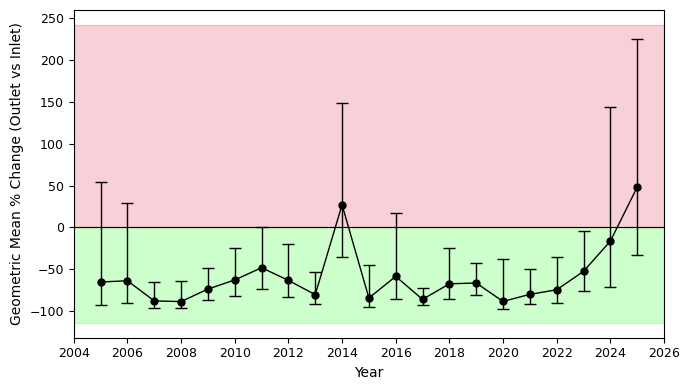

In [63]:
#plots stat_per_year where 100% (GM =1) is reset to 0

#% change relative to inlet (negative = reduced)
stats_per_year['GM_%'] = (stats_per_year['GM'] - 1.0) * 100.0
stats_per_year['CI_lo_%'] = (stats_per_year['CI_lo'] - 1.0) * 100.0
stats_per_year['CI_hi_%'] = (stats_per_year['CI_hi'] - 1.0) * 100.0


years = stats_per_year['Year'].values #x axis
means = stats_per_year['GM_%'].values #y axis
yerr = np.vstack([means - stats_per_year['CI_lo_%'].values, stats_per_year['CI_hi_%'].values - means]) #CI below/above mean (error bar)

plt.rcParams.update({
    "font.size": 10,
    "font.family": "sans-serif",
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

fig, ax = plt.subplots(figsize = (7, 4))

#plotting years (x vals), means (y vals), yerr (error bar)
ax.errorbar(years, means, yerr = yerr, fmt = '-o', capsize = 4, color = 'black')

ax.set_xlabel('Year')
ax.set_ylabel('Geometric Mean % Change (Outlet vs Inlet)')


ax.set_xlim(left = 2004, right = 2026)
ax.xaxis.set_major_locator(mticker.MultipleLocator(2)) #every 2 years for x axis

#shaded parts 
ax.axhline(0, color = 'black', linewidth = 0.8) #zero line
ax.axhspan(ymin = ax.get_ylim()[0], ymax = 0, color = 'lime', alpha = 0.2) #green below
ax.axhspan(ymin = 0, ymax = ax.get_ylim()[1], color = 'crimson', alpha = 0.2) #red above

plt.tight_layout()

plt.savefig("Annual_GM_PctChange3.png", dpi = 300, bbox_inches = "tight")
plt.savefig("Annual_GM_PctChange3.pdf", bbox_inches = "tight")

plt.show()

In [64]:
#comparing at  two inlets, test correlation
#pearsonr, spearmanr, ttest_rel, wilcoxon
#each measurement taken at the same time so observations are paired

from scipy.stats import pearsonr, spearmanr, ttest_rel, wilcoxon

#drop rows with NaN in either (because need to compare vals)
df_inlets = merged_df[['Jefferson Inlet', 'Riparian Corridor Inlet']].dropna()

#log-transform
Jefferson = np.log(df_inlets['Jefferson Inlet'])
Riparian = np.log(df_inlets['Riparian Corridor Inlet'])

#correlation tests
pearson_corr, p_val_p = pearsonr(Jefferson, Riparian) #measuring linear association (in log space here)
spearman_corr, p_val_s = spearmanr(Jefferson, Riparian) #if spearman >> pearson, nonlinear scaling

#paired difference test
#null hypothesis is that on average, difference between the 2 inlets is zero
#or neither inlet is consistently above/below the other
t_stat, p_val_t = ttest_rel(Jefferson, Riparian)
w_stat, p_val_w = wilcoxon(Jefferson - Riparian)


print("Correlation tests:")
print(f"Pearson r = {pearson_corr:.3f}, p = {p_val_p:.3e}")
print(f"Spearman ρ = {spearman_corr:.3f}, p = {p_val_s:.3e}\n")

print("Paired difference tests:")
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.3e}")
print(f"Wilcoxon test: W = {w_stat:.3f}, p = {p_val_w:.3e}")


Correlation tests:
Pearson r = 0.508, p = 1.438e-15
Spearman ρ = 0.514, p = 5.980e-16

Paired difference tests:
Paired t-test: t = -0.964, p = 3.364e-01
Wilcoxon test: W = 10343.500, p = 4.051e-01


In [65]:
#r = 0.508, r^2 = 0.26
#so about 26% of variance is shared
#pearson r and spearmn values are both about 0.5, relationship not being driven by outliers, ranking structure is stable
#association ~ linear in log space
#the two inlets co-vary moderately

#one inlet isnt consistently higher/lower than other
#t-test: mean levels about equal, Wilcox median levels about equal

In [66]:
merged_df

,Collection Date,Marsh Outlet,Jefferson Inlet,Riparian Corridor Inlet,Average Inlet,Geometric Mean Inlet,GM Difference,Difference,Year,Inlet Log10,Outlet Log10,Difference Log10,Season,Ratio
0,2005-10-09,10.0,52.0,NaN,52.0,52.000000,42.000000,42.0,2005,1.716003,1.000000,0.716003,Fall,0.192308
1,2005-10-24,305.0,425.0,NaN,425.0,425.000000,120.000000,120.0,2005,2.628389,2.484300,0.144089,Fall,0.717647
2,2005-11-06,522.0,119.0,NaN,119.0,119.000000,-403.000000,-403.0,2005,2.075547,2.717671,-0.642124,Fall,4.386555
3,2005-11-20,118.0,260.0,NaN,260.0,260.000000,142.000000,142.0,2005,2.414973,2.071882,0.343091,Fall,0.453846
4,2005-12-04,20.0,1334.0,NaN,1334.0,1334.000000,1314.000000,1314.0,2005,3.125156,1.301030,1.824126,Winter,0.014993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2025-03-16,932.0,548.0,213.0,380.5,341.648943,-590.351057,-551.5,2025,2.580355,2.969416,-0.389061,Spring,2.449409
245,2025-03-30,481.0,341.0,1497.0,919.0,714.476732,233.476732,438.0,2025,2.963316,2.682145,0.281170,Spring,0.523395
246,2025-04-13,959.0,393.0,132.0,262.5,227.763035,-731.236965,-696.5,2025,2.419129,2.981819,-0.562689,Spring,3.653333
247,2025-04-27,24196.0,11199.0,2755.0,6977.0,5554.569740,-18641.430260,-17219.0,2025,3.843669,4.383744,-0.540075,Spring,3.467966


In [67]:
#overall over 20 years 

GM = gmean (merged_df['Ratio'])
print(f"Geometric mean ratio = {GM:.3f}")

m = np.log(merged_df['Ratio'].dropna())
gm = m.mean()
n = len (merged_df['Ratio'].dropna())
se = m.std(ddof = 1) / np.sqrt(n) if n > 1 else 0.0
z = 1.96 #95% CI
ci_lo = np.exp(gm - z*se)
ci_hi = np.exp(gm + z*se)


print(f"95% CI = {ci_lo:.3f} to {ci_hi:.3f}")
print(f"n = {n} paired samples")
print(f"Geometric mean reduction = {100-GM*100:.0f}%")


Geometric mean ratio = 0.322
95% CI = 0.259 to 0.399
n = 247 paired samples
Geometric mean reduction = 68%


In [68]:
#before compare inlet with inlet; now comparing inlet with outlet

s = merged_df['Ratio'].dropna().astype(float)

#null hypothesis is that GM = 1
log_ratios = np.log(s)

w_stat, p_val = wilcoxon(log_ratios, alternative='two-sided')

#same test run another way, results should be the same

print(f"Wilcoxon test: W = {w_stat:.3f}, p = {p_val:.3g}")
#drop rows with NaN in either (because need to compare values)
df_inlets = merged_df[['Average Inlet', 'Marsh Outlet']].dropna()

#log-transform
Inlet = np.log(df_inlets['Average Inlet'])
Outlet = np.log(df_inlets['Marsh Outlet'])

#correlation tests
pearson_corr, p_val_p = pearsonr(Inlet, Outlet) #measuring linear association (in log space here)
spearman_corr, p_val_s = spearmanr(Inlet, Outlet) #if spearman >> pearson, nonlinear scaling

#paired difference test
#null hypothesis is that on average, difference between the 2 inlets is zero
#or neither inlet is consistently above/below the other
t_stat, p_val_t = ttest_rel(Inlet, Outlet)
w_stat, p_val_w = wilcoxon(Inlet - Outlet)


print("Correlation tests:")
print(f"Pearson r = {pearson_corr:.3f}, p = {p_val_p:.3e}")
print(f"Spearman ρ = {spearman_corr:.3f}, p = {p_val_s:.3e}\n")

print("Paired difference tests:")
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.3e}")
print(f"Wilcoxon test: W = {w_stat:.3f}, p = {p_val_w:.3e}")

Wilcoxon test: W = 4638.000, p = 7.33e-20
Correlation tests:
Pearson r = 0.552, p = 4.217e-21
Spearman ρ = 0.562, p = 5.856e-22

Paired difference tests:
Paired t-test: t = 10.348, p = 4.543e-21
Wilcoxon test: W = 4638.000, p = 7.334e-20
